<a href="https://colab.research.google.com/github/mugobrian201/portfolio/blob/main/Air_Quality_in_Beijing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beijing Air Quality Analysis Project**

I have successfully downloaded and combined air quality data from 12 different monitoring stations across Beijing, China. The dataset contains measurements taken from 1st March 2013 to 28th February 2017 which is exactly 4 years of detailed environmental data. I accessed the data from Kaggle.The data includes:

    Air pollutants: PM2.5, PM10, SO2, NO2, CO, O3

    Weather conditions: Temperature, pressure, dew point, rain, wind direction, wind speed

    Time information: Year, month, day, hour

    Location data: 12 different monitoring stations across Beijing

I will use Linear Regression, AutoRegressive Model and finalise with an AutoRegressive Moving Average Model

In [84]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/beijing-multisite-airquality-data-set")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'beijing-multisite-airquality-data-set' dataset.
Path to dataset files: /kaggle/input/beijing-multisite-airquality-data-set


In [85]:
import pandas as pd
import os

# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/sid321axn/beijing-multisite-airquality-data-set/versions/1"

# List all files in the directory
print("Files in the dataset:")
for file in os.listdir(path):
    print(f"- {file}")

# Typically, the main data file might be a CSV file
# Look for CSV files specifically
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\nCSV files found: {csv_files}")

# Load the first CSV file (or specify the exact file name if you know it)
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"\nLoaded {csv_files[0]}")
    print(f"DataFrame shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
else:
    print("No CSV files found. Checking for other file types...")

    # List all files to see what's available
    all_files = os.listdir(path)
    print("All files:", all_files)

Files in the dataset:
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Gucheng_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv

CSV files found: ['PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-201702

In [86]:

# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/sid321axn/beijing-multisite-airquality-data-set/versions/1"

# Get all CSV files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Method 1: Concatenate all files at once
df_list = []
for file in csv_files:
    file_path = os.path.join(path, file)
    temp_df = pd.read_csv(file_path)
    df_list.append(temp_df)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

print(f"Combined DataFrame shape: {df.shape}")
print("\nFirst few rows of combined data:")
print(df.head())
print(df.info())

Combined DataFrame shape: (420768, 18)

First few rows of combined data:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 no

IMPORT THE NECESSARY LIBRARIES

In [87]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import pytz  # For timezone handling
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

# **Predicting Daily PM2.5 Air Quality Levels in Beijing Using Linear Regression: A Time Series Approach**

Air pollution, particularly fine particulate matter (PM2.5), poses significant health and environmental risks in urban areas like Beijing. This study analyzes a multi-site dataset spanning March 2013 to February 2017, comprising hourly measurements of PM2.5 and meteorological variables from 12 monitoring stations. The primary objective is to develop a predictive model for daily average PM2.5 concentrations using linear regression as an initial baseline approach.

Data preprocessing involved concatenating station-specific CSV files, converting timestamps to a timezone-aware index (Asia/Shanghai), resampling to daily means with forward-filling for missing values, and removing extreme outliers (>350 μg/m³) to mitigate skew while preserving key pollution events. Exploratory data analysis revealed a mean PM2.5 of approximately 77.56 μg/m³, with positive autocorrelation (correlation coefficient 0.55) between consecutive days, justifying the inclusion of a lag-1 feature (previous day's PM2.5 average) as the sole predictor.

The dataset was split chronologically into training (80%) and testing (20%) sets to respect time series structure. A linear regression model was fitted, yielding the equation: PM2.5 = 34.51 + 0.56 × (Previous Day's PM2.5). Performance was evaluated using mean absolute error (MAE), with the model achieving a training MAE of 38.02 μg/m³ and a test MAE of 37.88 μg/m³, outperforming a naive baseline (mean prediction MAE of 46.45 μg/m³).

Visualizations, including time series plots and autocorrelation scatterplots, highlighted seasonal pollution trends and the lag feature's predictive value. While linear regression provides a simple, interpretable benchmark, limitations include its assumption of linearity and independence, which may overlook complex temporal dynamics. Future extensions will incorporate autoregressive (AR) and autoregressive moving average (ARMA) models to enhance forecasting accuracy.

Localizing the Timezone

In [88]:
# Create datetime index
datetime_index = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index(datetime_index)
#Localize Timezone
df.index = df.index.tz_localize("UTC").tz_convert("Asia/Shanghai")
#Drop unnecessary columns
df.drop(columns = ["No", "year", "month", "day", "hour"], inplace=True)

DATA EXPLORATION

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64


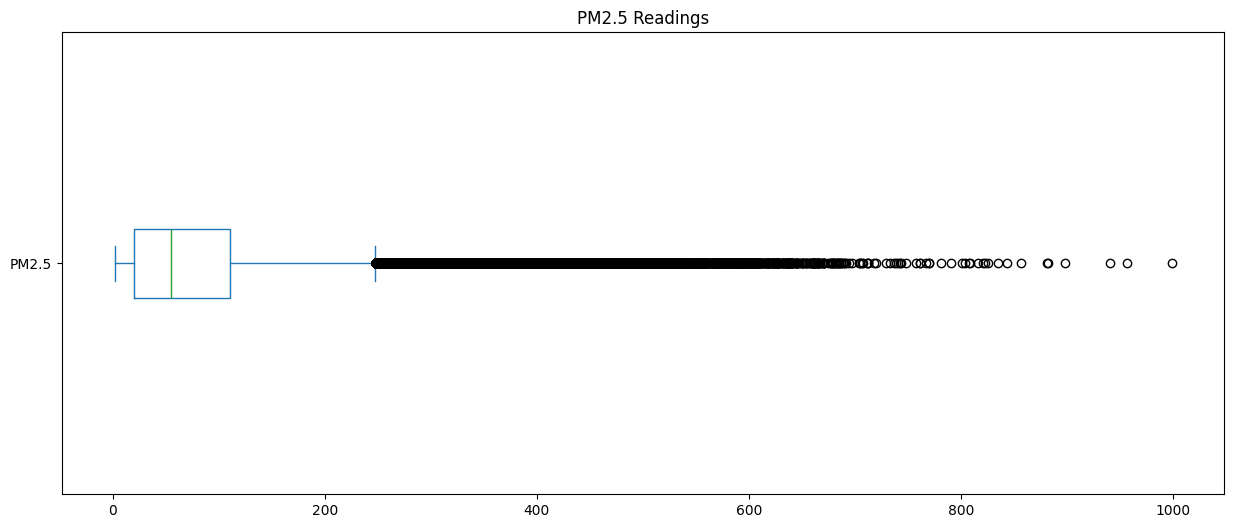

In [89]:
#Summary statistics of 'PM2.5' Readings
print(df["PM2.5"].describe())
fig, ax = plt.subplots(figsize=(15, 6))
df["PM2.5"].plot(kind="box", vert=False, title="PM2.5 Readings", ax=ax)
plt.show()


From my boxplot, there are many outliers. It would be advisable to remove readings above 350 ug/m3

Note:
    Good: 0-12 μg/m³

    Moderate: 12-35 μg/m³

    Unhealthy: 35-150 μg/m³

    Hazardous: 150+ μg/m³

These outliers represent severe pollution events that are important for environmental analysis but may skew statistical models.

In [90]:
#Remove outliers >350 ug/m3
#Read only "PM2.5" Readings < 350ug/m3
df = df[df["PM2.5"]< 350]

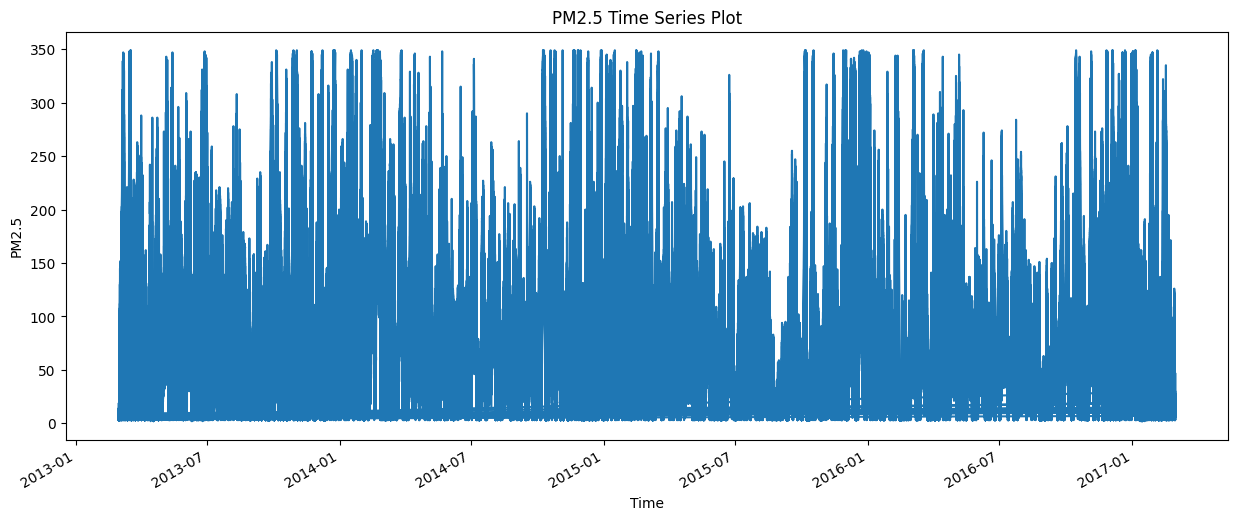

In [91]:
#Time Series Plot of 'PM2.5' Readings
fig, ax = plt.subplots(figsize=(15, 6))
df["PM2.5"].plot(xlabel="Time", ylabel="PM2.5", title="PM2.5 Time Series Plot", ax=ax)
plt.show();

As seen, it is difficult to do an interepretation of my time series visualization.

I need to Resample my dataframe to provide the mean of 'PM2.5' Readings for each day.

I will predict the PM2.5 Readings for each day and use forward fill to impute any NaN(missing values).

In [92]:
#Resample my Time Series Data
#Use forward fill to fill any NaN
df = df["PM2.5"].resample("D").mean().fillna(method="ffill").to_frame()

It will be difficult to analyze using a time series plot, that is, increase or decrease trend in air pollution, monthly or seasonal trend of Air Pollution.

A Rolling Average Plot is recommendable(Mean value of multiple subsets of numbers in a dataset) It will show the average of the previous 168 hours (7 days) of PM2.5 readings

In [93]:
df.head()

,PM2.5
2013-03-01 00:00:00+08:00,5.802083
2013-03-02 00:00:00+08:00,13.218750
2013-03-03 00:00:00+08:00,80.666667
2013-03-04 00:00:00+08:00,30.232639
2013-03-05 00:00:00+08:00,82.142322


<Axes: title={'center': 'Weekly Rolling Average'}, ylabel='PM2.5'>

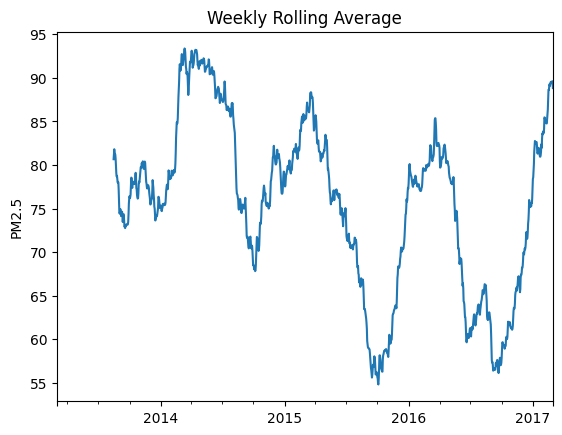

In [94]:
#Calculating Rolling Averages and plotting it
df["PM2.5"].rolling(168).mean().plot(ylabel="PM2.5", title = "Weekly Rolling Average")

From the plot we can see the following;

 Upward slopes indicating pollution is building up

 Downward slopes showing that Air quality is improving

 Flat periods show stable pollution levels

 Sharp peaks also showing sudden pollution events

My goal is to create a Model that will have features that will help me predict 'PM2.5' readings, which is my target vector.

I want to create a lag feature('PM2.5.L1'), a new column that will contain the mean 'PM2.5' from the previous day. It will help me predict 'PM2.5' Readings.

I need to note that this new feature will produce NaN that I need to drop.

In [95]:
df.head()

,PM2.5
2013-03-01 00:00:00+08:00,5.802083
2013-03-02 00:00:00+08:00,13.218750
2013-03-03 00:00:00+08:00,80.666667
2013-03-04 00:00:00+08:00,30.232639
2013-03-05 00:00:00+08:00,82.142322


In [96]:
#Create a new column (lag feature)
df["P2.L1"] = df["PM2.5"].shift(1)
df.dropna(inplace = True)

After creating a new column, I want to check the Autocorrelation btw 'PM2.5' and 'P2.L1'

Autocorrelation will be the relationship between the readings of today and what happened the day before.

I will check the correlation and also plot the relationahip using a scatter plot and line plot.

         PM2.5    P2.L1
PM2.5  1.00000  0.55322
P2.L1  0.55322  1.00000


Text(0.5, 1.0, 'PM2.5 Autocorrelation')

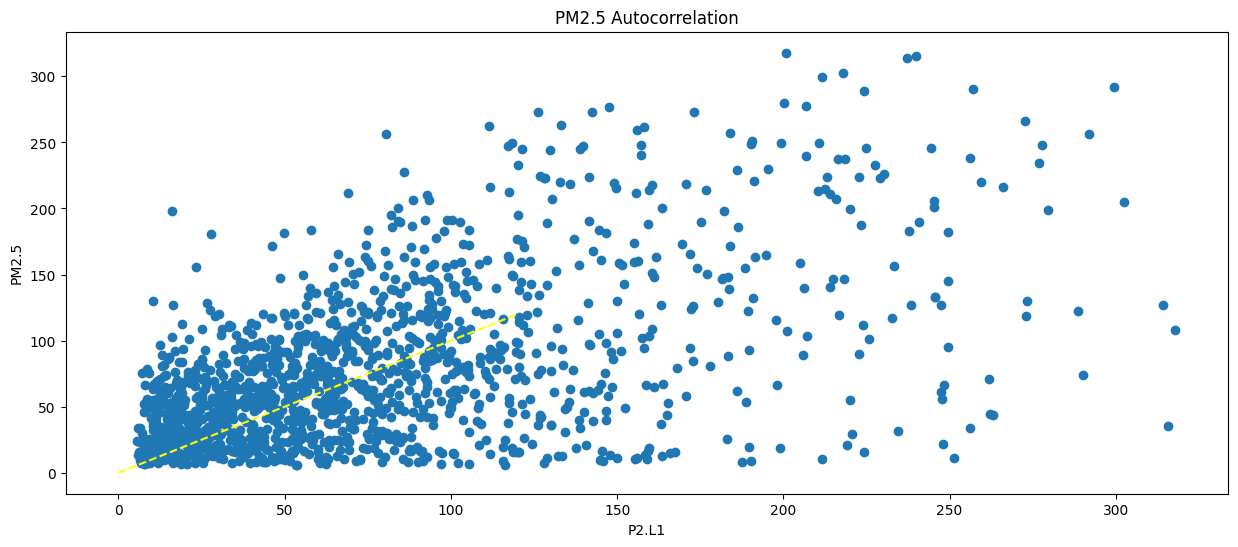

In [97]:
#Autocorrelation
print(df.corr())
#Autocorrelation Plot
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(x=df["P2.L1"], y=df["PM2.5"])
ax.plot([0,120], [0,120], linestyle = "--", color="yellow")
plt.xlabel("P2.L1")
plt.ylabel("PM2.5")
plt.title("PM2.5 Autocorrelation")

The dense clustering of points around the lower left (that is, 0 to 150 on both axes) suggests that lower PM2.5 readings tend to follow lower readings from the previous day, which is common in air quality data due to stable atmospheric conditions.

There’s a spread of points extending to higher values (up to 300), indicating occasional higher PM2.5 levels, potentially due to pollution spikes or weather changes.

There is a strong correlation between the two features which suggests that a lag-1 feature will be a useful predictor.

The plot confirms that PM2.5 readings show a positive autocorrelation at a 1-day lag. This means the current day's PM2.5 level is somewhat predictive of the next day's level, supporting the use of a lag feature in modeling.

I want to now split between the Feature Matrix(X) and Target Vector(y). I also want to use train-test split for time series to split X and y to training and test sets. 80% of my data will be used for training and 20% for testing.

I also need to note that my training set MUST come before the test set.

Split   feature matrix(X) and target vector(y)

In [98]:
target = "PM2.5"
y = df[target]
print(y.shape)
X = df.drop(columns=target)
print(X.shape)

(1461,)
(1461, 1)


In [99]:
#Dividing my feature matrix and target vector
#Take every row from the start of my dataframe up to but not including the cutoff row
cutoff = int(len(X)*0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
print(X_train.shape, y_train.shape)
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]
print(X_test.shape, y_test.shape)

(1168, 1) (1168,)
(293, 1) (293,)


BUILD MODEL

Baseline

In [100]:
y_mean = y_train.mean()
print("Mean:", round(y_mean, 2))
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline:", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("mae_baseline:", round(mae_baseline, 2))

Mean: 77.56
Baseline: [np.float64(77.5607472032176), np.float64(77.5607472032176), np.float64(77.5607472032176), np.float64(77.5607472032176), np.float64(77.5607472032176)]
mae_baseline: 46.45


Iterate

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred_training = model.predict(X_train)
print("Training:", y_pred_training)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("mae training:", mae_training)
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("test mae:", test_mae)

Training: [37.72992988 41.85071058 79.32550697 ... 58.2175662  51.87923289
 95.00521122]
mae training: 38.022621334507825
test mae: 37.88414608484889


Both my training and test data have beat the Baseline.

My LinearRegression Model also shows that it generalizes well with new data.

COMMUNICATE RESULTS

In [103]:
#Extract Intercept
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)
print(f"PM2.5 = {intercept} + ({coefficient}*P2.L1)")

PM2.5 = 34.51 + ([0.56]*P2.L1)



I want to create a DataFrame with two columns, 'y_test' which will contain my actual values and 'y_pred_test' which will contain my model's predictions

In [104]:
df_pred_test = pd.DataFrame(
    {
        "y_test" : y_test,
        "y_pred_test" : model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_pred_test
2016-05-13 00:00:00+08:00,27.293286,83.372006
2016-05-14 00:00:00+08:00,34.210526,49.670676
2016-05-15 00:00:00+08:00,43.122378,53.513970
2016-05-16 00:00:00+08:00,23.219512,58.465491
2016-05-17 00:00:00+08:00,42.939929,47.407243


In [105]:
#Plot Time Series Predictions
fig = px.line(df_pred_test, labels = {"value":"PM2.5"})
fig.show()

The two lines track closely, with predictions smoothing out some volatility in actuals e.g., underestimating peaks (>150 μg/m³) but capturing trends accurately in moderate ranges.

Overall, the overlap demonstrates good fit, especially for stable periods, but highlights room for improvement in extremes


# **Predicting Daily PM2.5 Air Quality Levels in Beijing Using AutoRegressive(AR) Models: A Time Series Approach**


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-02 00:00:00+08:00 to 2017-03-01 00:00:00+08:00
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1461 non-null   float64
 1   P2.L1   1461 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


EXPLORE

Plotting both an ACF and PACF plot,  
An ACF plot is a good visual representation of an autocorrelation function and how they change over time.
This plot will help know how many lags are required for my model to have good predictive power.

A PACF plot is a good visual representation of the direct observations only.
This plot will help see the direct observations and should be eliminated because they are not of help.

Text(0, 0.5, 'Correlation Coefficient')

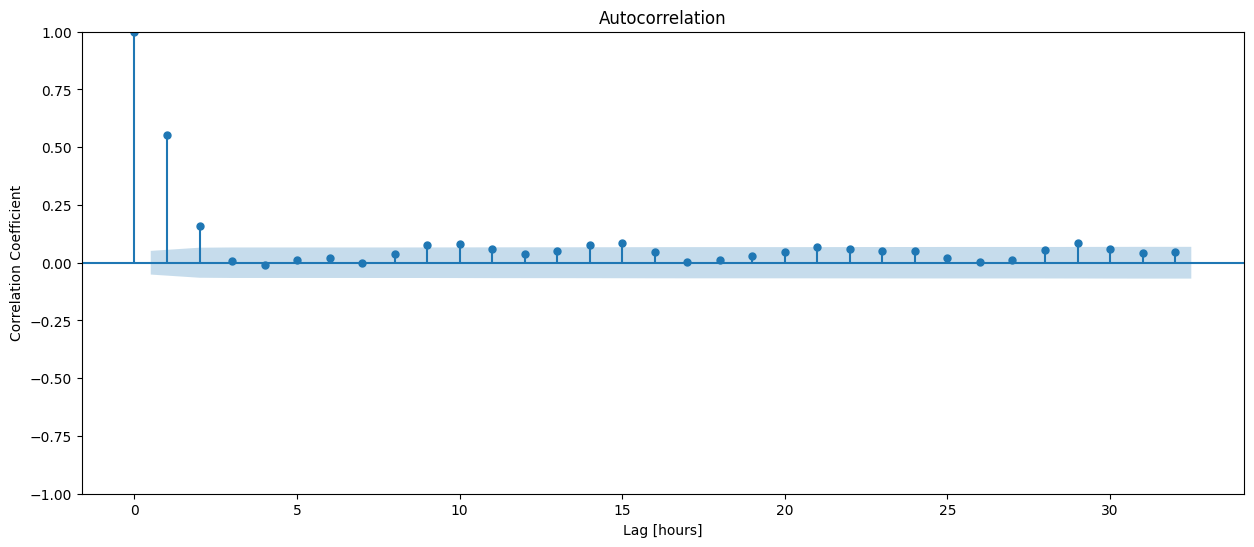

In [107]:
#Plot ACF
fig, ax = plt.subplots(figsize=(15,6))
plot_acf(df["PM2.5"], ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

Text(0, 0.5, 'Correlation Coefficient')

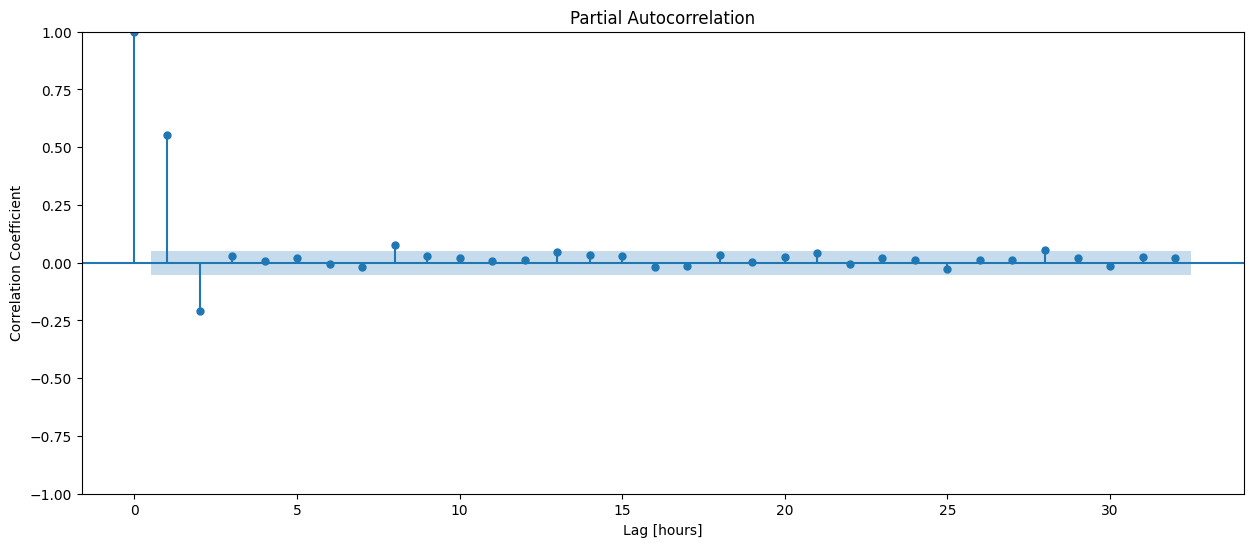

In [108]:
#Plot PACF
fig, ax = plt.subplots(figsize=(15,6))
plot_pacf(df["PM2.5"], ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

From both diagrams, we can see bars at each lag where the height of each bar represents the correlation coefficient of each lag.

If a bar extends beyond the significance bounds, it indicates significant autocorrelation at that lag.

I am using the PACF plot so as to know the number of lags I will use to instantiate my AR Model. From my plot, it is clear that lags 1-8 show significant spikes indicating that these lags are important for modelling.

SPLIT

Train-test split

Here, there is no vertical split, only horizontal split.

95% of my data will be training test and 5% of my data will be test set to bring into line with statsmodel Confidence Interval.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-02 00:00:00+08:00 to 2017-03-01 00:00:00+08:00
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1461 non-null   float64
 1   P2.L1   1461 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


In [110]:
cutoff_test = int(len(df["PM2.5"]) * 0.95)
print(cutoff_test)
y_train_ar = df["PM2.5"].iloc[: cutoff_test]
print(y_train_ar.shape)
y_test_ar = df["PM2.5"].iloc[cutoff_test :]
print(y_test_ar.shape)

1387
(1387,)
(74,)


BUILD MODEL

Baseline

In [111]:
y_mean_ar = y_train_ar.mean()
print("Mean:", y_mean_ar)
y_pred_baseline_ar = [y_mean_ar] * len(y_train_ar)
print("Baseline:", y_pred_baseline_ar[:5])
mae_baseline_ar = mean_absolute_error(y_train_ar, y_pred_baseline_ar)
print("mae_baseline:", round(mae_baseline_ar, 2))

Mean: 76.03166763193752
Baseline: [np.float64(76.03166763193752), np.float64(76.03166763193752), np.float64(76.03166763193752), np.float64(76.03166763193752), np.float64(76.03166763193752)]
mae_baseline: 45.1


Iterate

I need to instantiate my AR Model and fit it to the training data(*y_train_ar*). I also need to set my lags argument to 8.

An AR Model is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time steps.

Also,this model does not have a feature matrix, only a Target Vector

In [112]:
#Instantiate my model
model_ar = AutoReg(y_train_ar, lags=8).fit()

Training Prediction

There will be NaN Values which need to be dropped first, then begin predicting from the second row of my y_train_ar

In [113]:
# The model likely starts predictions after the lag period
y_pred_training_ar = model_ar.predict().dropna()
training_mae_ar = mean_absolute_error(
    y_train_ar.loc[y_pred_training_ar.index],
    y_pred_training_ar
)
print("Training mae:", training_mae_ar)

Training mae: 35.357924861372084


My AR Model has successfully beat the baseline

Calculating Residuals

Residuals

When performing any type of Regression Analysis, we end up with a line of best fit. Because our data comes from the real world, it tends to be messy so the data points do not fall exactly on this line, they are scattered around it and a residual is the vertical distance between each individual data point and the regression line. Each data point has only one residual which can be positive if above the regression line and vice versa, or 0 if the line directly passes through the data point.  that is, (True value - Predicted Value)

In [114]:
 #Calculating Residuals
 y_train_ar_resid = model_ar.resid
 y_train_ar_resid.tail()

,0
2016-12-13 00:00:00+08:00,-53.921231
2016-12-14 00:00:00+08:00,-48.510906
2016-12-15 00:00:00+08:00,17.117746
2016-12-16 00:00:00+08:00,-22.669162
2016-12-17 00:00:00+08:00,78.152965


<Axes: ylabel='Residual Value'>

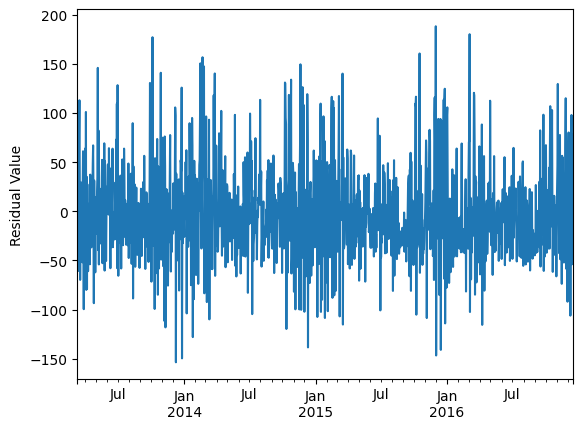

In [115]:
 #Residual : Time Series
 y_train_ar_resid.plot(ylabel="Residual Value")

Text(0.5, 1.0, 'AR(2), Dist of Residuals')

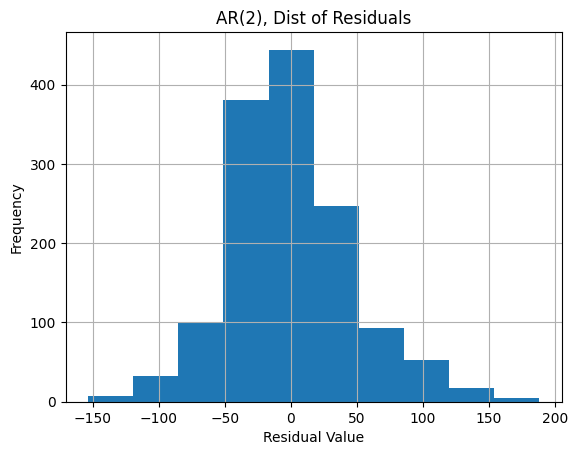

In [116]:
#Histogram of y_train_resid_ar
y_train_ar_resid.hist()
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("AR(2), Dist of Residuals")

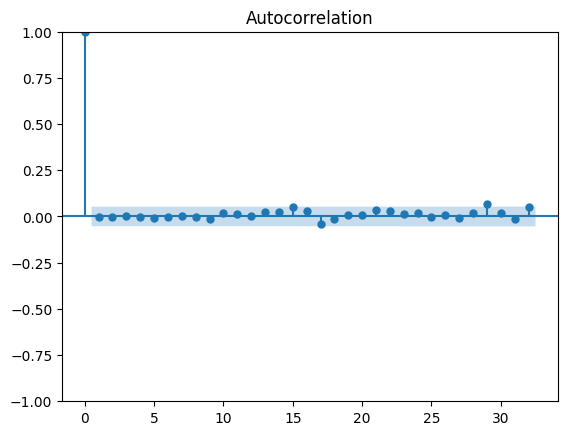

In [117]:
#Plot ACF Plot of Residuals
plot_acf(y_train_ar_resid);

It is difficult to interprete the Time Series of Residuals.

But its histogram shows a Normal Distribution of Residuals, around a zero mean.

With the ACF Plot, the height of the bars do not go beyond the significant bounds. We do not want any correlation happening in the residuals and my AR Model removed all predictive power during training.

EVALUATE MODEL

In [118]:
#timestamp for the first index
print("min:", y_test_ar.index.min())
print("max:", y_test_ar.index.max())
#prediction test
y_pred_test_ar = model_ar.predict(y_test_ar.index.min(),y_test_ar.index.max())
print("Prediction:", y_pred_test_ar[:5])
mae_test_ar = mean_absolute_error(y_test_ar, y_pred_test_ar)
print("Mae test:", mae_test_ar)

min: 2016-12-18 00:00:00+08:00
max: 2017-03-01 00:00:00+08:00
Prediction: 2016-12-18 00:00:00+08:00    129.511506
2016-12-19 00:00:00+08:00     84.059615
2016-12-20 00:00:00+08:00     78.129577
2016-12-21 00:00:00+08:00     84.491981
2016-12-22 00:00:00+08:00     80.548463
Freq: D, dtype: float64
Mae test: 63.65148036873894


I want to create a DataFrame with two columns, 'y_test_ar' which will contain my actual values and 'y_pred_test_ar' which will contain my model's predictions

In [119]:
df_pred_test_ar = pd.DataFrame(
    {
        "y_test_ar" : y_test_ar,
        "y_pred_test_ar" : y_pred_test_ar
    },
        index = y_test_ar.index
)
df_pred_test_ar.head()

,y_test_ar,y_pred_test_ar
2016-12-18 00:00:00+08:00,215.704280,129.511506
2016-12-19 00:00:00+08:00,206.829268,84.059615
2016-12-20 00:00:00+08:00,239.919540,78.129577
2016-12-21 00:00:00+08:00,315.753623,84.491981
2016-12-22 00:00:00+08:00,34.987578,80.548463


In [120]:
#Time Series plot for values in test predictions
fig = px.line(df_pred_test_ar, labels = {"value" : "PM2.5"})
fig.show()

This is not a good plot. Traditional test evaluation does not work when working with a Time Series Model

Walk Forward Validation(wfv)

Validation is evaluating how well a model performs on unseen data, ensuring it can generalize beyond the data it was trained on.

My predictions lose power over time because the model gets further and further away from its beginning. What if I could move that beginning forward with the model? ie. Retrain each model for each new observation in the dataset, dropping the data that is farthest in the plot.

I want to look at the last prediction of the training data, the first row of the test data then an out of sample prediction of the next timestamp.

In [121]:
#last prediction of the training data
history = y_train_ar.copy()
print("history:", history.tail(1))
#First row of test data
model_ar = AutoReg(history, lags=8).fit()
print("forecast:", model_ar.forecast()) #out of sample prediction of the next timestamp

history: 2016-12-17 00:00:00+08:00    149.732639
Freq: D, Name: PM2.5, dtype: float64
forecast: 2016-12-18 00:00:00+08:00    129.511506
Freq: D, dtype: float64


I want to create a Series of my wfv prediction. Then I will train my model on history data and generate a forecast(next timestamp). After that, I will append my forecasts to my pd.Series.

I will also go into my test set, get the next data point at the next timestamp and append to my history, that is, find equivalent test data point that is at the same timestamp.

In [122]:
# Initialize variables
y_pred_wfv_ar = pd.Series(dtype='float64')
history = y_train_ar.copy()

# Walk-forward validation loop
for i in range(len(y_test_ar)):
    model_ar = AutoReg(history, lags=8).fit()
    next_pred_ar = model_ar.forecast()
    # Concatenate the new prediction to y_pred_wfv_ar
    y_pred_wfv_ar = pd.concat([y_pred_wfv_ar, next_pred_ar])
    # Concatenate the actual test data point to history
    history = pd.concat([history, y_test_ar[next_pred_ar.index]])


In [123]:
#Test Evaluation
mae_test_wfv = mean_absolute_error(y_test_ar, y_pred_wfv_ar)
print("wfv_test_mae:", mae_test_ar)
print(model_ar.params)

wfv_test_mae: 63.65148036873894
const       36.906350
PM2.5.L1     0.675280
PM2.5.L2    -0.230838
PM2.5.L3     0.031521
PM2.5.L4    -0.007863
PM2.5.L5     0.017347
PM2.5.L6     0.028183
PM2.5.L7    -0.074183
PM2.5.L8     0.078641
dtype: float64


In [124]:
df_pred_test_ar_wfv = pd.DataFrame(
    {
        "y_test_ar" : y_test_ar,
        "y_pred_wfv_ar" : y_pred_wfv_ar
    },
        index = y_test_ar.index
)
df_pred_test_ar.head()
#Plot wfv predictions
fig = px.line(df_pred_test_ar_wfv, labels = {"value" : "PM2.5"})
fig.show()



# **Predicting Daily PM2.5 Air Quality Levels in Beijing Using AutoRegressive Moving Average(ARMA) Models: A Time Series Approach**


# Explore

Exploration is by using both the ACF and PACF plots which will be quite similar to the visualizations I used for the AR Model

# Split

For the splitting step, we'll use very small training and test sets due to the computational intensity of the model.

In [125]:
target_arma = "PM2.5"
y_arma = df[target]
cutoff_arma = int(len(y_arma)*0.80)
y_train_arma = y_arma.iloc[:cutoff_arma]
print("y_train:", y_train_arma.shape)
y_test_arma = y_arma.iloc[cutoff_arma:]
print("y_test_arma:", y_test_arma.shape)

y_train: (1168,)
y_test_arma: (293,)


BUILD MODEL

Baseline

In [126]:
y_mean_arma = y_train_arma.mean()
print("Mean:", y_mean_arma)
y_pred_baseline_arma = [y_mean_arma] * len(y_train_arma)
mae_baseline_arma = mean_absolute_error(y_train_arma, y_pred_baseline_arma)
print("Mae Baseline:", mae_baseline_arma)

Mean: 77.5607472032176
Mae Baseline: 46.445078113235766


Let us try to first understand the concept of ARMA Models, which is categorized into two parts, that is AR Model which was the previous model we used which looked at past readings to make present predictions. Another concept that we will look at is Hyperparameters.

AR Equation;

yt​=β0​+β1​yt−1

For the MA part, it helps us look not only at the past readings but also the errors in those readings, that is the difference between past predictions and actual value. This constitutes to the following ARMA Equation;

yt​=β0​+β1​yt−1​+θϵt−1

The reason for including the MA part is that time series models can often suffer when there is something called exogenous shocks, which means kind of one-time events that throw the readings several times, subsequent time, steps out of the norm.

A kind of shock event that can have echoes in subsequent predictions, and we can anticipate those by turning by using this sort of error term, which will be helpful for a model.

Parameters are elements a ML Model learns from the training data.

Hyperparameters involve two values(p and q) and these values are set before training. They significantly affect how the model is trained and how it performs;

where p represents the number of lag observations included in the model. q is the error lag, that is the size of the moving average window.

PACF will be used to choose the best lag(p)

ACF will beused to choose the best value for (q)

Another way for choosing the best values for p and q is through hyperparameter tuning.


Hyperparameter Tuning


I want to create a range of values for possible p values that should range between 0 and 25 by steps of 8 and q values between 0 and 3 by steps of 1.

Reason for doing more p params than q params is because that is how the ARMA Model works

In [127]:
p_params = range(0, 25, 8)
print("p values:", p_params)
q_params = range(0, 3, 1)
print("q values:", q_params)

p values: range(0, 25, 8)
q values: range(0, 3)


Hyperparameter Grid Search

This helps in searching for the best combination of these hyperparameters to achieve optimal model perfomance.For each combination of p and q, we train a model and calculate the (MAE) for the training data. We repeat this process for every combination in the grid and save the MAE values. After we have all the MAE values, we can identify the combination of p and q that gives us the best performance.

We can achieve this by using a double for loop where for each of the p values, we will also consider q values. Then we will create an 'order' which will represent the number of lags or error lags.We'll set the first part of the order as p and leave the second part blank. This is because we are using the ARIMA model with only p and q, making it an ARMA model in practice.After setting up the order, we need to train the model with each set of hyperparameters.

It is important to note that as p increases, the model will take longer to train. Once the model is trained, we generate predictions called in-sample predictions using the predict() method. We will then calculate the training MAE.

To store the MAE results for each hyperparameter combination, we decide to use a dictionary. We will create a dictionary called MAE grid where each key represents a value of p and its corresponding value is a list containing the MAE values for different q values.

In [128]:
#Create a dictionary to store MAEs
mae_grid = {}
#Outer loop:Iterate through possible values of 'p'
for p in p_params:
  #Create a new key in dictionary with empty list
  mae_grid[p] = list()
  #Inner loop: Iterate through possible values for q
  for q in q_params:
    #Combination of hyperparameters for model
    order = (p, 0, q)
    #Start time
    start_time = time.time()
    #Train model
    model_arma = ARIMA(y_train_arma, order=order).fit()
    #Calculate Model Training Time
    elapsed_time = round(time.time() - start_time, 2)
    print(f"Trained ARIMA {order} in {elapsed_time} seconds")
    #Generate in sample predictions
    y_pred_arma = model_arma.predict()
    #Calculate training MAE
    mae_training_arma = mean_absolute_error(y_train_arma, y_pred_arma)
    #Append MAE List in dictionary
    mae_grid[p].append(mae_training_arma)
print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.42 seconds
Trained ARIMA (0, 0, 1) in 0.49 seconds
Trained ARIMA (0, 0, 2) in 0.42 seconds
Trained ARIMA (8, 0, 0) in 1.78 seconds
Trained ARIMA (8, 0, 1) in 2.73 seconds
Trained ARIMA (8, 0, 2) in 4.36 seconds
Trained ARIMA (16, 0, 0) in 7.12 seconds
Trained ARIMA (16, 0, 1) in 12.39 seconds
Trained ARIMA (16, 0, 2) in 8.28 seconds
Trained ARIMA (24, 0, 0) in 17.86 seconds
Trained ARIMA (24, 0, 1) in 15.74 seconds
Trained ARIMA (24, 0, 2) in 17.47 seconds

{0: [46.445077119962704, 38.18810461643185, 37.0250110043047], 8: [36.569496116541615, 36.58703751225764, 36.5019057610969], 16: [36.38924491708958, 36.389195557172016, 36.37960179656448], 24: [36.31601370264682, 36.31656410336091, 36.315996092214334]}


After training our 12 models, the shortest training time was 0.2 seconds and the longest was 57.95 seconds. It is clear that increasing the number of lags increases the computational load required for training. This is particularly true for error lag terms, which significantly increase computational demand.

Grid Search Scores

What set of Hyperparameters will give usthe best model performance?

I want to organize all MAE from above in a dataframe. Each row will represent possible values for q and each column will represent all possible values for p. In the middle, we will have the mean absolute errors for models trained with these sets of hyperparameters.

In [129]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(3)

,0,8,16,24
0,46.445,36.569,36.389,36.316
1,38.188,36.587,36.389,36.317
2,37.025,36.502,36.380,36.316


Grid Search Heatmap

This will be for the values in mae_grid,
x_axis- p_values
y_axis- q_values

Text(0.5, 1.0, 'ARMA Grid Search(Criterion:MAE)')

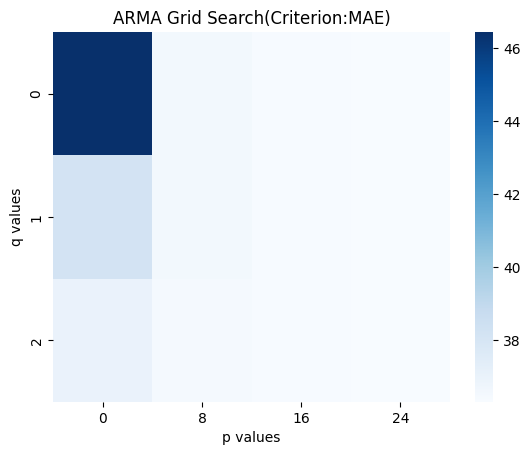

In [130]:
sns.heatmap(mae_df, cmap="Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA Grid Search(Criterion:MAE)")

From the Visualization, the light blue colours indicate lower MAE which show better model performance. The model with the best performance is the one where p is equal to 24 and q is equal to 0(18.42 seconds) but the difference with the performance of other models is minimal.

While our current models are relatively small and use a small training set, larger models with millions or trillions of observations have significant resource implications. Longer model training times mean more time spent sitting and waiting, reducing iteration and improvement time. Additionally, using cloud computing for longer periods increases operation costs. Not to forget, excessive use of electricity to power these computing resources also has environmental implications.

Considering these factors, it’s crucial to consider not only the performance but also the resources needed to train the models. Just optimizing for better performance might not always be the best choice when you can achieve similar results while reducing computational resources. It’s a win for time, cost, and the environment. Therefore, when training models, it’s imperative to think about both performance and the cost of computations.

ARMA Plot Diagnostics

This is an easier way to check residuals for your model. It will represent the residuals from the last model I have trained.

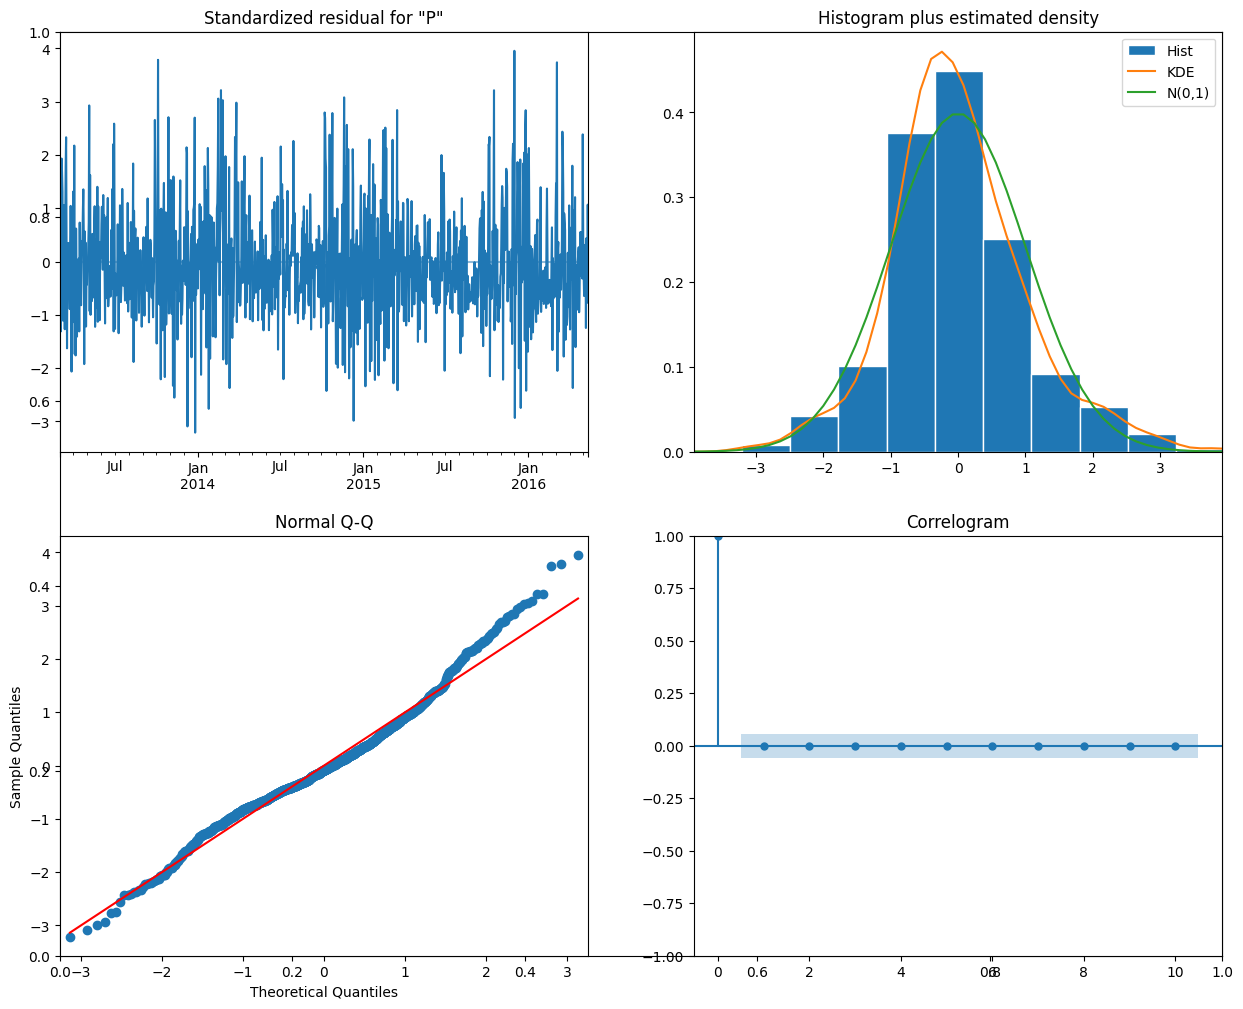

In [131]:
fig, ax = plt.subplots(figsize=(15,12))
model_arma.plot_diagnostics(fig=fig);

The output shows a visualization of 4 Diagrams. The first plot displays residuals that seem to be centered at 0. The second plot displays a Histogram with a Normal Distribution. The third plot is a Normal Q-Q plot where the aim is for the dots to align with the red line, signifying a non-skewed distribution. The fourth plot is a collelogram that displays the ACF of the residuals.The ACF plot appears as expected, showing correlation coefficients close to one at zero lag.

EVALUATE

It's time to evaluate our model. Let's perform walk-forward validation.

There are two things that we need to add to the previous code. In this case, we need to add our best model. So, we will put in an ARMA model and then fit it with the training data, as we did in the last part. The other thing we need to do is specify an order, and remember that we will have to retrain this model at every step.I will go with the model that takes 18 seconds, so we will specify the order as (24,0,0) and then use the fit method.

In [134]:
y_pred_wfv_arma = pd.Series()
history_arma = y_train_arma.copy()
for i in range(len(y_test_arma)):
  model_arma = ARIMA(history_arma, order=(8,0,0)).fit()
  next_pred_arma = model_arma.forecast()
  y_pred_wfv_arma = pd.concat([y_pred_wfv_arma, next_pred_arma])
  history_arma =pd.concat([history_arma, next_pred_arma])
test_mae_arma = mean_absolute_error(y_test_arma, y_pred_wfv_arma)
print("Test MAE (walk forward validation):", round(test_mae_arma, 2))

Test MAE (walk forward validation): 46.13


Plot wfv Predictions

In [136]:
df_predictions_arma = pd.DataFrame(
    {
        "y_test_arma" : y_test_arma,
        "y_pred_wfv_arma" : y_pred_wfv_arma
    }
)
fig = px.line(df_predictions_arma, labels = {"value" : "PM2.5"})
fig.show()